In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the uploaded CSV files to inspect the data
file_path = r'C:\Users\Pear\Documents\Data Projects\data_files\US_inflation_rates.csv'

file_path_2 = r'C:\Users\Pear\Documents\Data Projects\data_files\rice_beef_coffee_price_changes.csv'

file_path_3 = r'C:\Users\Pear\Documents\Data Projects\data_files\cleaned_data\US_Bigmac_prices.csv'

df = pd.read_csv(file_path)

df_beef = pd.read_csv(file_path_2)

# Display the first few rows to understand the structure of the dataframe
df.head()

,date,value
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


In [248]:
# Filter the dataset to include only rows where the date is January 1st of each year
df['date'] = pd.to_datetime(df['date'])  # Convert to datetime format
df_filtered = df[df['date'].dt.strftime('%m-%d') == '01-01']

df_filtered.head()

,date,value
0,1947-01-01,21.48
12,1948-01-01,23.68
24,1949-01-01,24.01
36,1950-01-01,23.51
48,1951-01-01,25.38


In [249]:
# Create a new copy of the filtered dataframe to avoid SettingWithCopyWarning
df_filtered = df[df['date'].dt.strftime('%m-%d') == '01-01'].copy()

# Add the "Year" column
df_filtered['year'] = df_filtered['date'].dt.year

# Display the updated dataframe
df_filtered.head()

,date,value,year
0,1947-01-01,21.48,1947
12,1948-01-01,23.68,1948
24,1949-01-01,24.01,1949
36,1950-01-01,23.51,1950
48,1951-01-01,25.38,1951


In [250]:
# Remove the "date" column and reorder columns to place "Year" first
df_filtered = df_filtered[['year', 'value']]

# Display the updated dataframe
df_filtered.head()

,year,value
0,1947,21.48
12,1948,23.68
24,1949,24.01
36,1950,23.51
48,1951,25.38


In [251]:
# Filter out rows where the Year is before 2000 and reset the index
df_filtered = df_filtered[df_filtered['year'] >= 2000].reset_index(drop=True)

# Display the updated dataframe
df_filtered.head()

,year,value
0,2000,169.3
1,2001,175.6
2,2002,177.7
3,2003,182.6
4,2004,186.3


In [252]:
# Create a new column "inflation rate" by dividing "value" by 75.58
# The goal is for the inflation rate to begin at 2.24 to match the year 2000 price of the BigMac
df_filtered['inflation rate'] = (df_filtered['value'] / 75.58).round(2)

# Display the updated dataframe
df_filtered.head()

,year,value,inflation rate
0,2000,169.3,2.24
1,2001,175.6,2.32
2,2002,177.7,2.35
3,2003,182.6,2.42
4,2004,186.3,2.46


In [253]:
# Remove the "value" column
df_filtered = df_filtered.drop(columns=['value'])

# Display the updated dataframe
df_filtered.head()

,year,inflation rate
0,2000,2.24
1,2001,2.32
2,2002,2.35
3,2003,2.42
4,2004,2.46


In [254]:
df_filtered.tail()

,year,inflation rate
19,2019,3.34
20,2020,3.43
21,2021,3.48
22,2022,3.74
23,2023,3.98


In [255]:
# Filter out rows where the Year is after 2022
df_filtered = df_filtered[df_filtered['year'] <= 2022].reset_index(drop=True)

# Display the updated dataframe
df_filtered.tail()

,year,inflation rate
18,2018,3.29
19,2019,3.34
20,2020,3.43
21,2021,3.48
22,2022,3.74


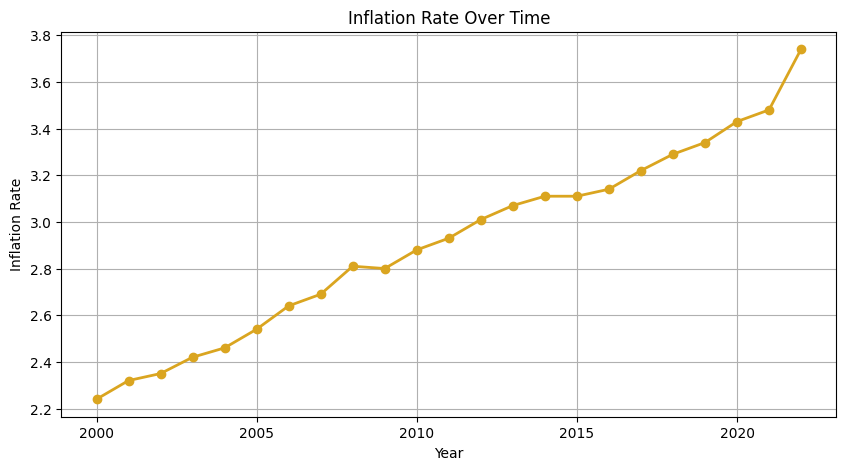

In [256]:
# Plot the inflation rate over time
plt.figure(figsize=(10, 5))
plt.plot(df_filtered['year'], df_filtered['inflation rate'], marker='o', linestyle='-', linewidth=2, color='#DAA520')

# Labels and title
plt.xlabel("Year")
plt.ylabel("Inflation Rate")
plt.title("Inflation Rate Over Time")
plt.grid(True)

# Show the plot
plt.show()

In [257]:
# Export the cleaned DataFrame to a CSV file
export_path = r'C:\Users\Pear\Documents\Data Projects\data_files\cleaned_data\2000_inflation_rates.csv'
#df_filtered.to_csv(export_path, index=False)

In [258]:
df_beef.head()

,Year,Month,Price_beef_kilo,Price_rice_kilo,Price_coffee_kilo,Inflation_rate,Price_rice_infl,Price_beef_infl,Price_coffee_infl
0,1992,Feb,2.52,0.28,1.51,89.59,0.53,4.78,2.86
1,1992,Mar,2.45,0.28,1.55,89.59,0.53,4.64,2.94
2,1992,Apr,2.38,0.28,1.45,89.59,0.53,4.51,2.75
3,1992,May,2.38,0.27,1.34,89.59,0.51,4.51,2.54
4,1992,Jun,2.33,0.27,1.30,89.59,0.51,4.42,2.46


In [259]:
# Filter the dataset to include only rows from the year 2000 and after
df_beef = df_beef[df_beef['Year'] >= 2000].reset_index(drop=True)

# Display the updated dataframe
df_beef.head()

,Year,Month,Price_beef_kilo,Price_rice_kilo,Price_coffee_kilo,Inflation_rate,Price_rice_infl,Price_beef_infl,Price_coffee_infl
0,2000,Jan,1.95,0.24,2.45,54.49,0.37,3.01,3.79
1,2000,Feb,1.96,0.24,2.28,54.49,0.37,3.03,3.52
2,2000,Mar,1.98,0.23,2.22,54.49,0.36,3.06,3.43
3,2000,Apr,1.98,0.21,2.09,54.49,0.32,3.06,3.23
4,2000,May,1.99,0.20,2.08,54.49,0.31,3.07,3.21


In [260]:
# Check if there is a January entry for every year in the dataset
jan_entries = df_beef[df_beef['Month'] == 'Jan']['Year'].unique()

# Get the list of unique years in the dataset
all_years = df_beef['Year'].unique()

# Find missing years that do not have a January entry
missing_years = [year for year in all_years if year not in jan_entries]

# Display the results
missing_years

[]

In [261]:
# Filter the dataset to keep only January entries
df_beef = df_beef[df_beef['Month'] == 'Jan'].reset_index(drop=True)

# Keep only the columns "Year" and "Price_beef_kilo"
df_beef = df_beef[['Year', 'Price_beef_kilo']]

# Display the updated dataframe
df_beef.head()

,Year,Price_beef_kilo
0,2000,1.95
1,2001,1.93
2,2002,2.21
3,2003,2.04
4,2004,2.54


In [262]:
# Rename the columns
df_beef = df_beef.rename(columns={"Price_beef_kilo": "Beef_Price_Adjusted", "Year": "year"})

# Display the updated dataframe
df_beef.head()

,year,Beef_Price_Adjusted
0,2000,1.95
1,2001,1.93
2,2002,2.21
3,2003,2.04
4,2004,2.54


In [263]:
# Adjust the Beef Price to match the initial BigMac price by multiplying "Beef_Price_Adjusted" by 1.1487
df_beef['Beef_Price_Adjusted'] = (df_beef['Beef_Price_Adjusted'] * 1.1487).round(2)

# Display the updated dataframe
df_beef.head()

,year,Beef_Price_Adjusted
0,2000,2.24
1,2001,2.22
2,2002,2.54
3,2003,2.34
4,2004,2.92


In [264]:
# Check column names to verify the issue
df_beef.columns

Index(['year', 'Beef_Price_Adjusted'], dtype='object')

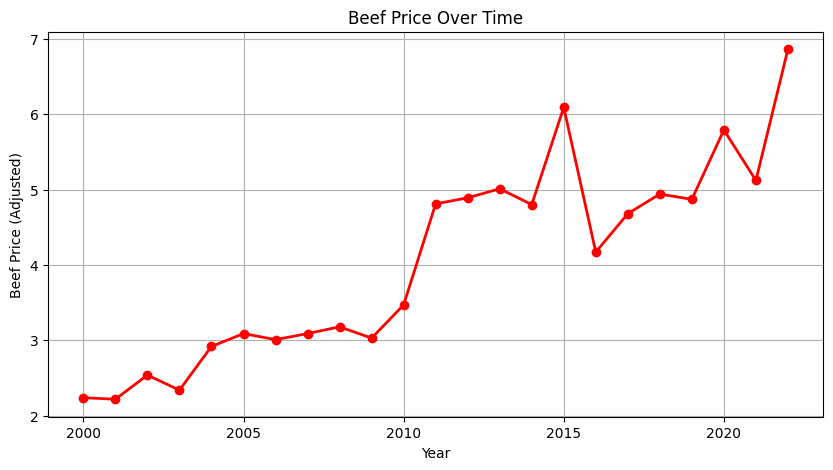

In [265]:
# Plot the beef price over time with a red line
plt.figure(figsize=(10, 5))
plt.plot(df_beef["year"], df_beef["Beef_Price_Adjusted"], marker='o', linestyle='-', linewidth=2, color='red')

# Labels and title
plt.xlabel("Year")
plt.ylabel("Beef Price (Adjusted)")
plt.title("Beef Price Over Time")
plt.grid(True)

# Show the plot
plt.show()


In [266]:
# Export the cleaned DataFrame to a CSV file
export_path = r'C:\Users\Pear\Documents\Data Projects\data_files\cleaned_data\Adjusted_Beef_Prices.csv'
#df_beef.to_csv(export_path, index=False)